- import libararies
- read data
- preprocessing check nulls duplicated categorical
- split data train test
- sklearn linear fit data
- show coeff weights biases
- pred estimation accuracy based rmse mse r2score

In [1]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

df = pd.read_csv('1000_Companies.csv')
display(df.head())
print('\n\n')
display(df.info())
print('\n\n')
display(df.isnull().sum())
print('\n\n')
display(df.duplicated().sum())

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


None

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

np.int64(1)

In [2]:
df = df.drop_duplicates()
df['State_enc'] = df['State'].map({'New York':0, 'California':1, 'Florida':2})

In [3]:
df[['State', 'State_enc']]

,State,State_enc
0,New York,0
1,California,1
2,Florida,2
3,New York,0
4,Florida,2
...,...,...
995,California,1
996,California,1
997,California,1
998,California,1


In [4]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State_enc']]
y = df['Profit']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (799, 4)
Shape of X_test: (200, 4)
Shape of y_train: (799,)
Shape of y_test: (200,)


In [5]:
from sklearn.linear_model import LinearRegression

mdl = LinearRegression()
mdl.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
from sklearn.metrics import r2_score

y_calculated = mdl.predict(X_test)

print("R2 Score:", r2_score(y_test, y_calculated))
print('Coeff = ', mdl.coef_)
print('Intercept = ', mdl.intercept_)

R2 Score: 0.983485183373316
Coeff =  [ 5.75811609e-01  1.06316707e+00  6.63729884e-02 -4.48964407e+02]
Intercept =  -72700.3943096012


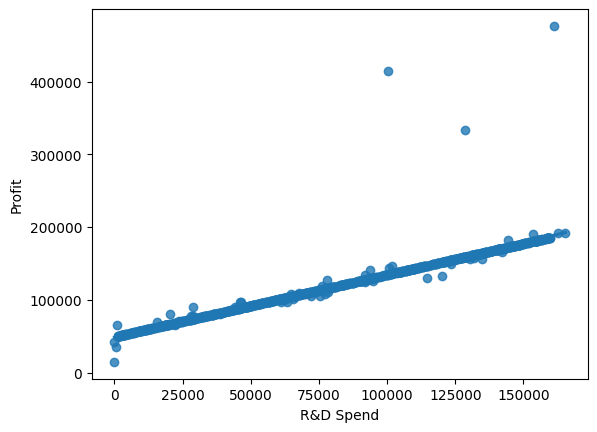

In [7]:
fig = plt.figure()

sns.regplot(x=df['R&D Spend'],
            y=df['Profit'],
            data=df,
            ci=None)

plt.show()

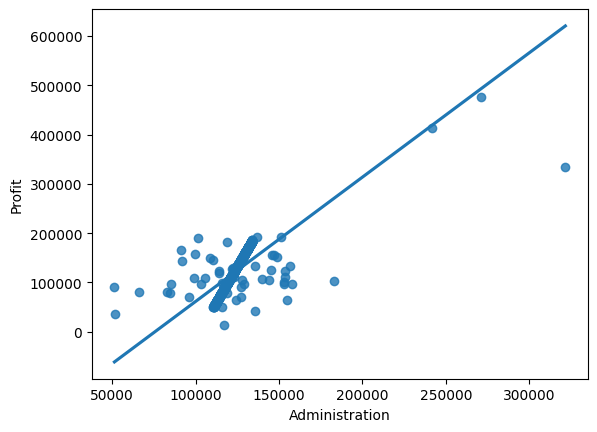

In [8]:
fig = plt.figure()

sns.regplot(x=df['Administration'],
            y=df['Profit'],
            data=df,
            ci=None)

plt.show()

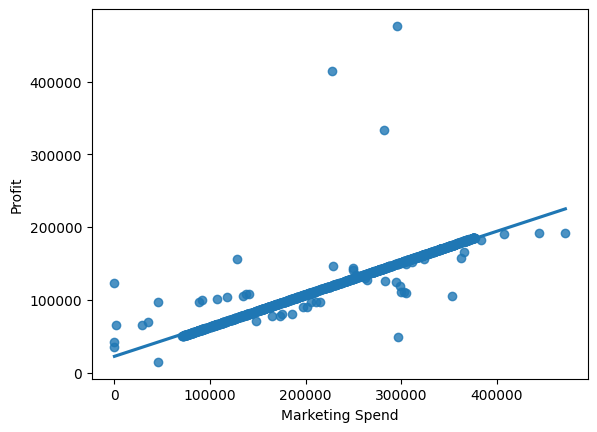

In [9]:
sns.regplot(x=df['Marketing Spend'],
            y=df['Profit'],
            data=df,
            ci=None)

plt.show()

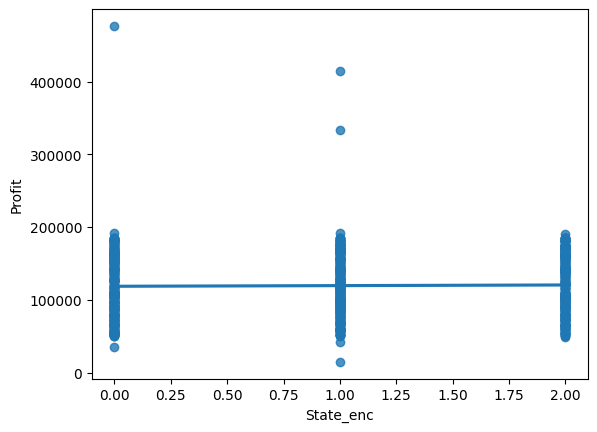

In [10]:
sns.regplot(x=df['State_enc'],
            y=df['Profit'],
            data=df,
            ci=None)

plt.show()

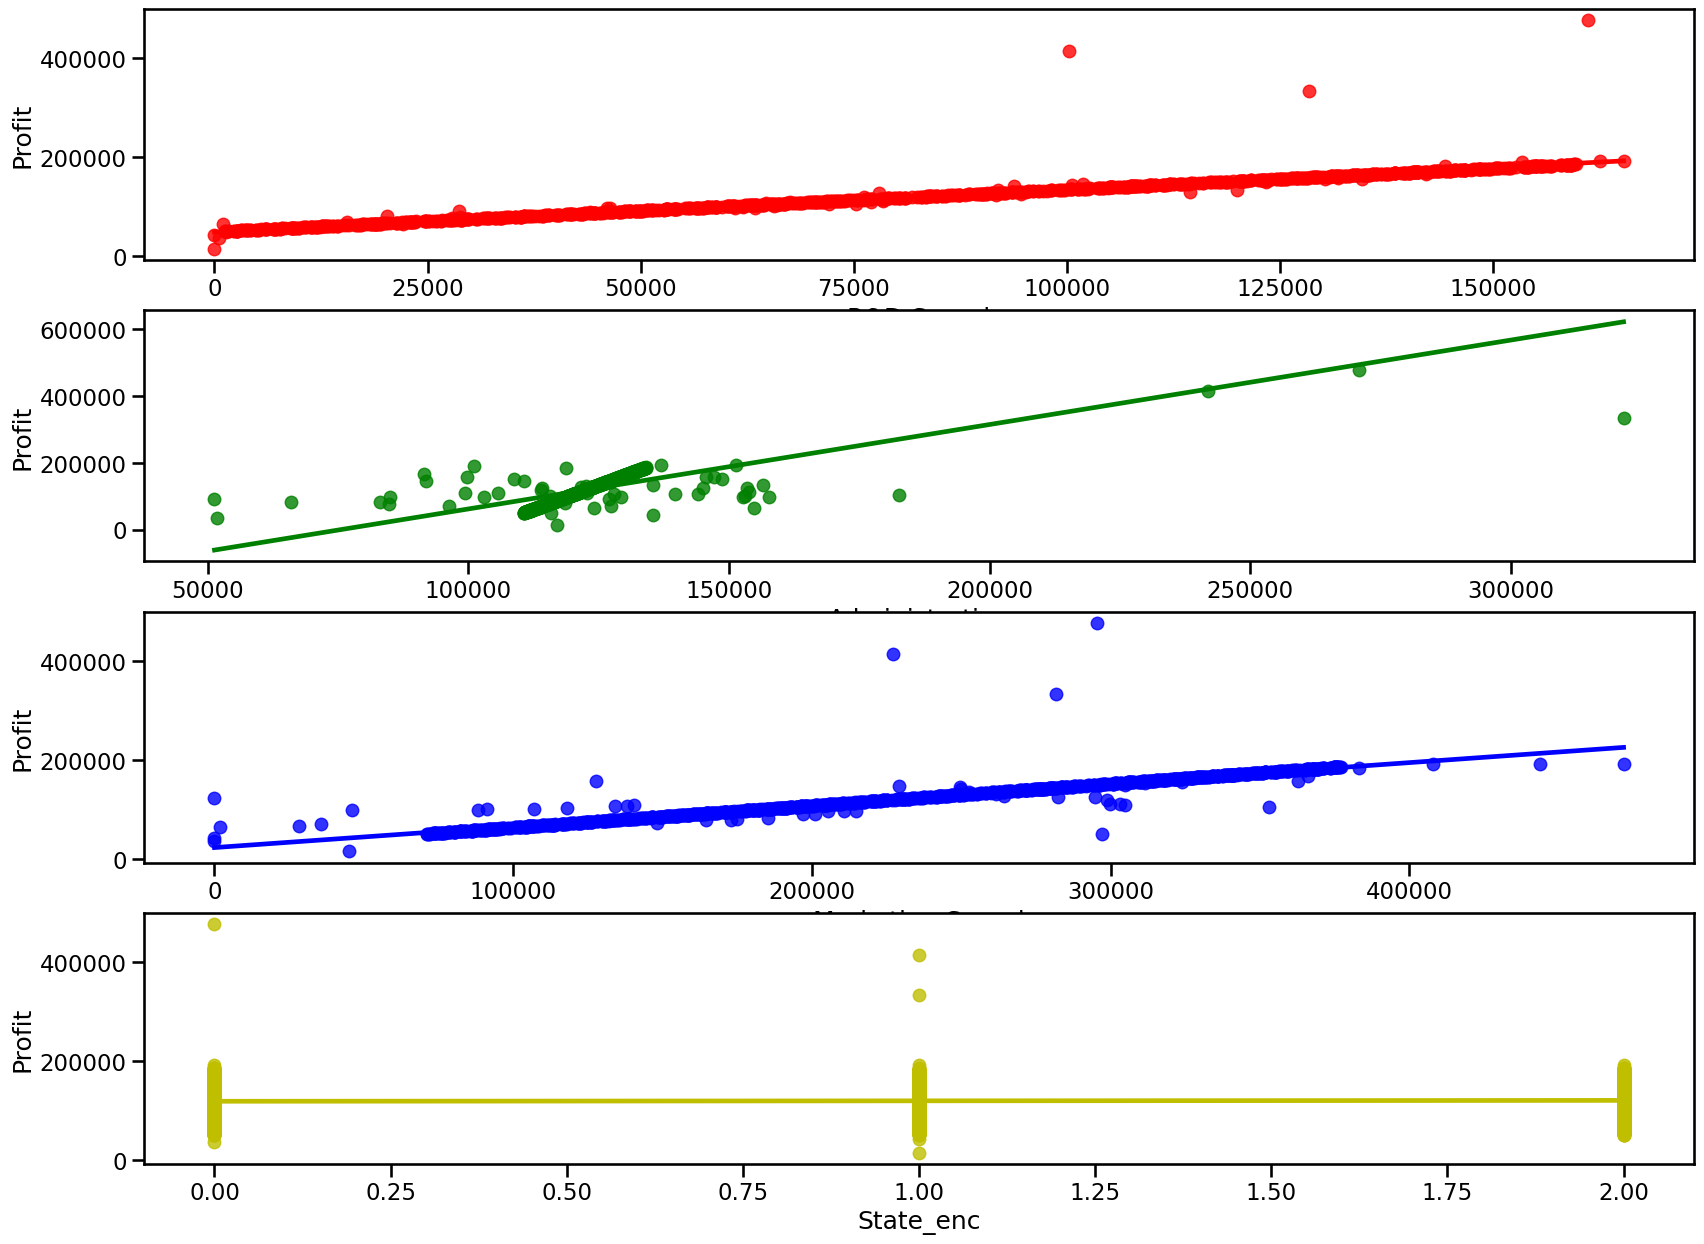

In [13]:
sns.set_context('talk')
fig, ax = plt.subplots(4)
fig.set_size_inches(20,15)
sns.regplot(x=df['R&D Spend'],
            y=df['Profit'],
            data=df,
            ax=ax[0],
            ci=None,
            label='R&D Spend',
            color='r')

sns.regplot(x=df['Administration'],
            y=df['Profit'],
            data=df,
            ax=ax[1],
            ci=None,
            label='Administration',
            color='g')

sns.regplot(x=df['Marketing Spend'],
            y=df['Profit'],
            data=df,
            ax=ax[2],
            ci=None,
            label='Marketing Spend',
            color='b')

sns.regplot(x=df['State_enc'],
            y=df['Profit'],
            data=df,
            ax=ax[3],
            ci=None,
            label='State_enc',
            color='y')

plt.show()
